<a href="https://colab.research.google.com/github/ArkaPrabhaChowdhury/Titanic_Survival_Prediction/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
train.shape 

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [ ]:
train_num=train[['Age','SibSp','Parch','Fare']]
train_cat=train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

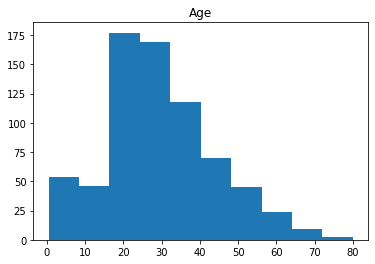

In [ ]:
plt.hist(train_num['Age'],bins=10)
plt.title("Age")
plt.show()

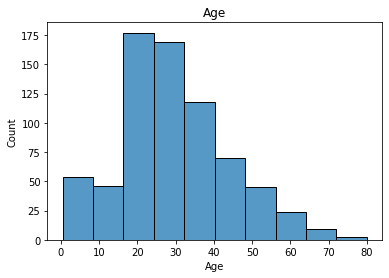

In [ ]:
sns.histplot(train_num['Age'],bins=10)
plt.title("Age")
plt.show()

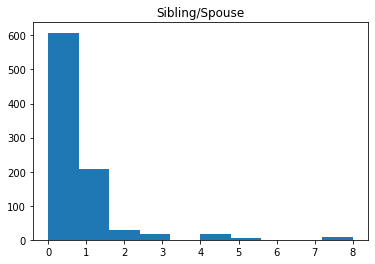

In [ ]:
plt.hist(train_num['SibSp'],bins=10)
plt.title("Sibling/Spouse")
plt.show()

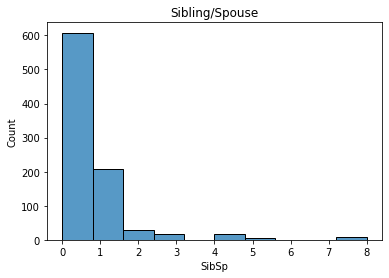

In [ ]:
sns.histplot(train_num['SibSp'],bins=10)
plt.title("Sibling/Spouse")
plt.show()

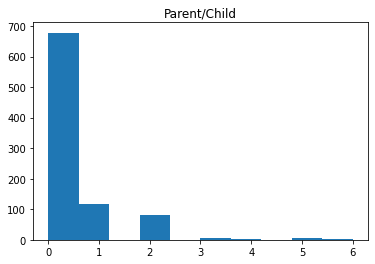

In [ ]:
plt.hist(train_num['Parch'],bins=10)
plt.title("Parent/Child")
plt.show()

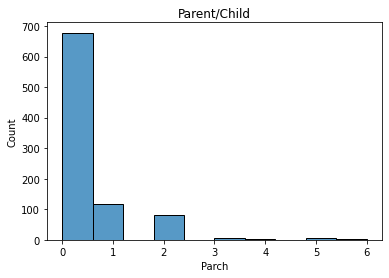

In [ ]:
sns.histplot(train_num['Parch'],bins=10)
plt.title("Parent/Child")
plt.show()

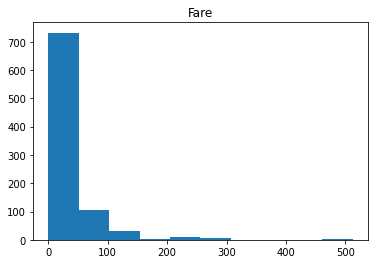

In [ ]:
plt.hist(train_num['Fare'],bins=10)
plt.title("Fare")
plt.show()

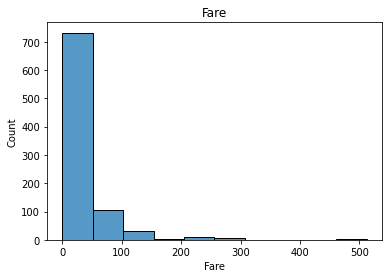

In [ ]:
sns.histplot(train_num['Fare'],bins=10)
plt.title("Fare")
plt.show()

In [ ]:
train_cat['Survived'].unique()

array([0, 1])

In [ ]:
train_cat['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

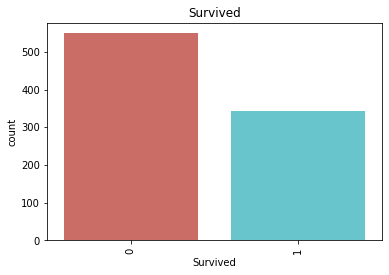

In [ ]:
sns.countplot(train_cat['Survived'],data=train_cat,palette='hls')
plt.xticks(rotation=90)
plt.title('Survived')
plt.show()

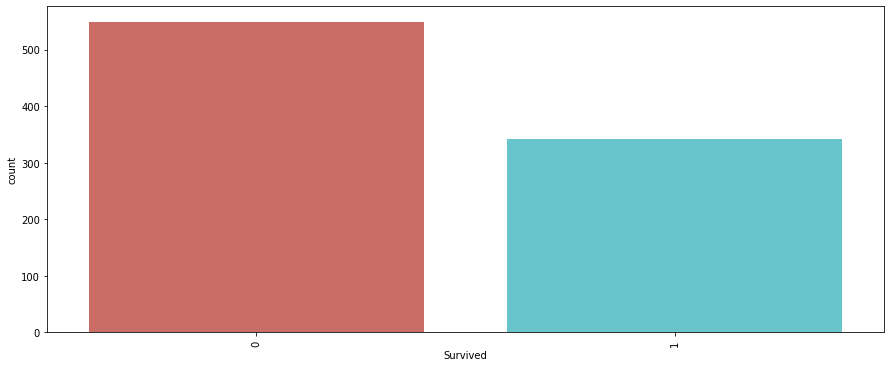

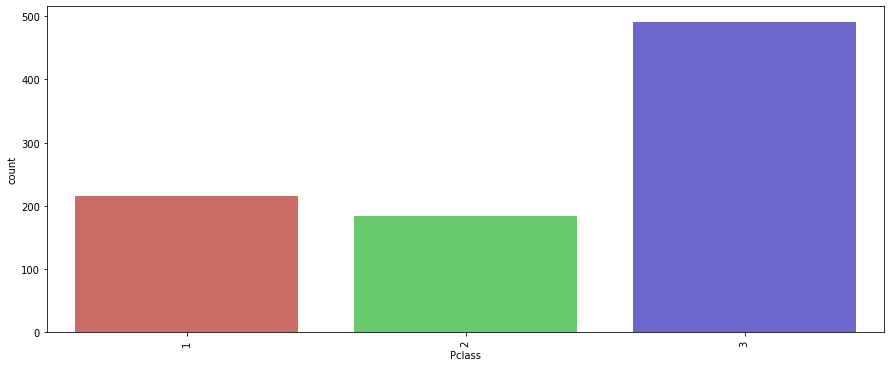

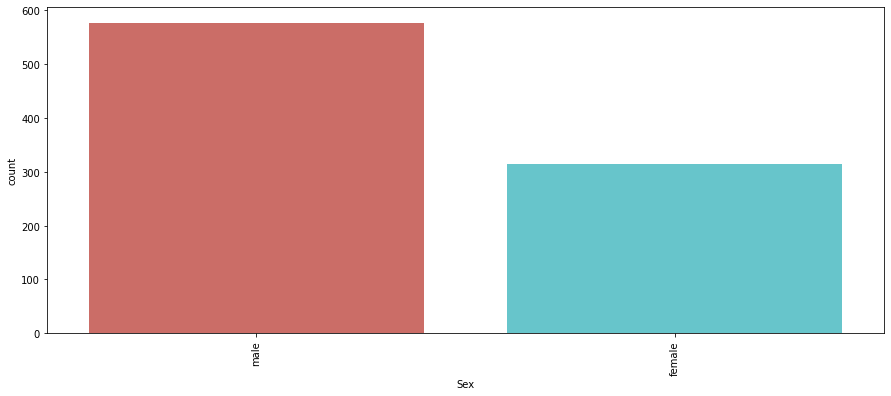

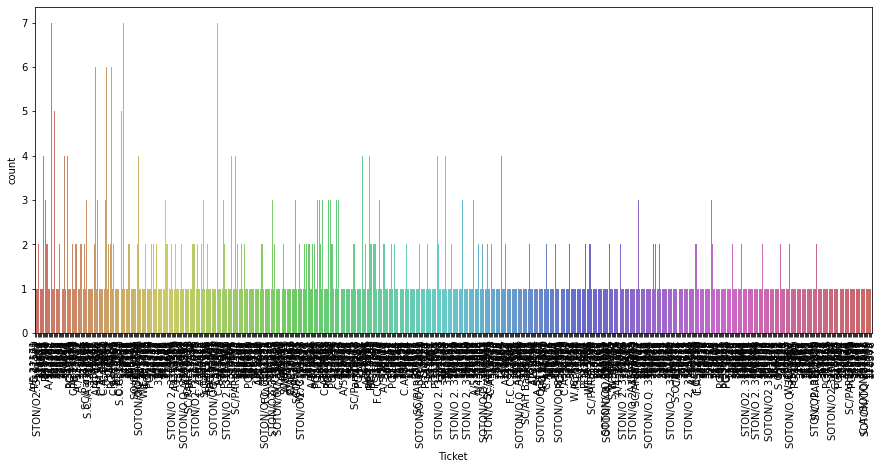

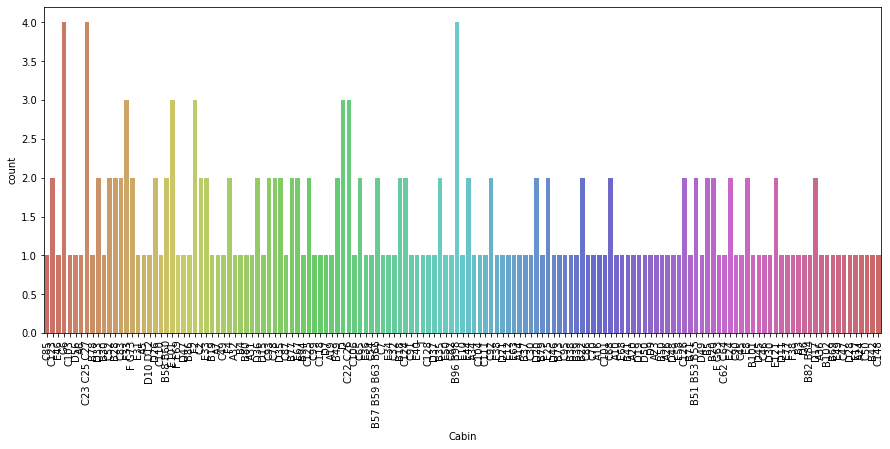

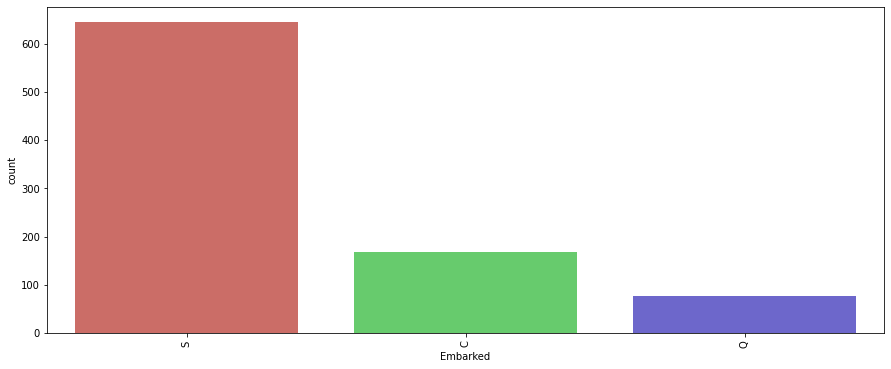

In [ ]:
for i in train_cat.columns:
  plt.figure(figsize=(15,6))
  sns.countplot(train_cat[i],data=train_cat,palette='hls')
  plt.xticks(rotation=90)
  plt.show()

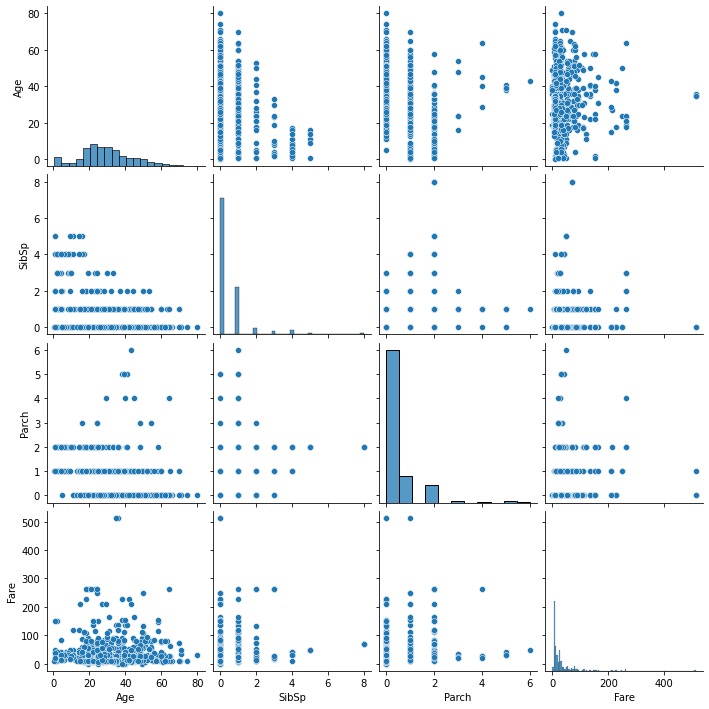

In [ ]:
sns.pairplot(train_num)
plt.show()

In [ ]:
print(train_num.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


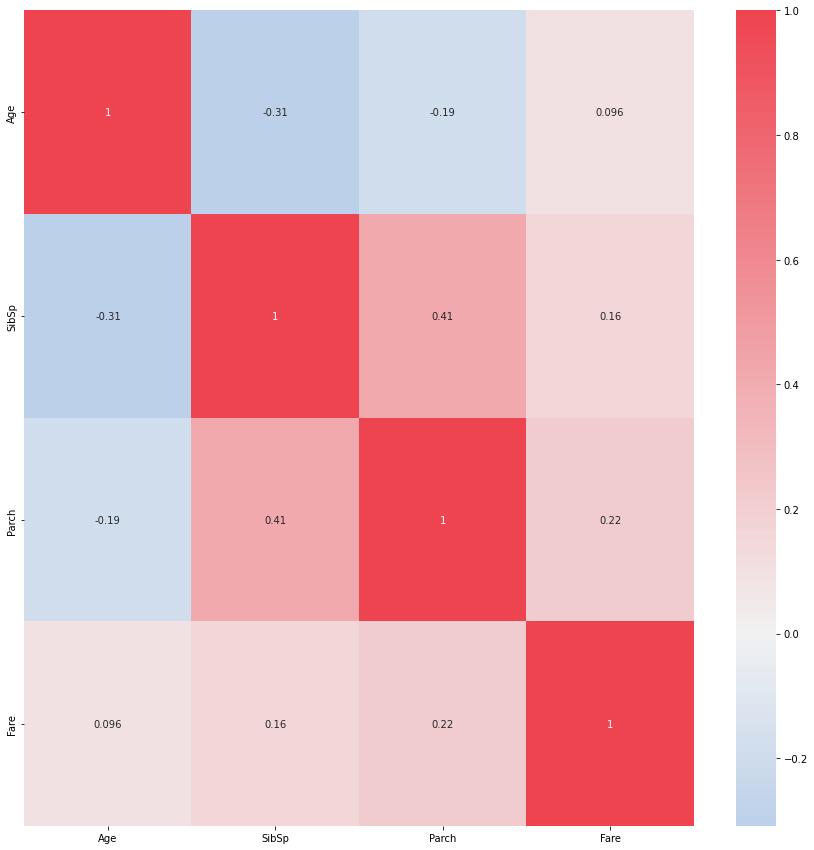

In [ ]:
plt.figure(figsize=(15,15))
cmap=sns.diverging_palette(250,10,s=80,l=55,n=9,as_cmap=True)
sns.heatmap(train_num.corr(),annot=True,cmap=cmap,center=0)
plt.show()

In [ ]:
pd.pivot_table(train,index='Survived',values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [ ]:
Survived=train_cat["Survived"].value_counts(normalize=True)

In [ ]:
Survived=pd.DataFrame(Survived)
display(Survived)

,Survived
0,0.616162
1,0.383838


In [ ]:
#Convert index into a column 
Survived=train_cat["Survived"].value_counts(normalize=True)
Survived=pd.DataFrame(Survived)
print(Survived.index)

Int64Index([0, 1], dtype='int64')


In [ ]:
Survived=Survived.reset_index()
display(Survived)

,index,Survived
0,0,0.616162
1,1,0.383838


In [ ]:
Survived=Survived.rename(columns={"index":"Survived","Survived":"% of Survivors"})
Survived["% of Survivors"]=Survived["% of Survivors"]*100
display(Survived)

Survived["% of Survivors"]=np.round(Survived["% of Survivors"],2)
display(Survived)

,Survived,% of Survivors
0,0,61.616162
1,1,38.383838


,Survived,% of Survivors
0,0,61.62
1,1,38.38


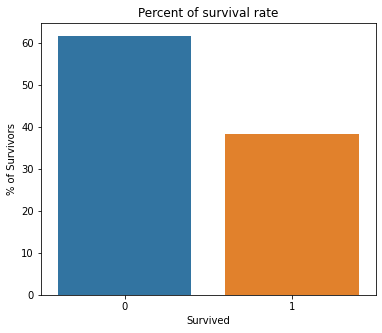

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x="Survived",y="% of Survivors",data=Survived)
plt.title("Percent of survival rate")
plt.show()

In [ ]:
Pclass=train_cat["Pclass"].value_counts(normalize=True)
Pclass=pd.DataFrame(Pclass)
Pclass=Pclass.reset_index()
#FiXing column names
Pclass=Pclass.rename(columns={"index":"Class","Pclass":"% of passengers"})
Pclass=Pclass.sort_values(by='Class')
Pclass["% of passengers"]=Pclass["% of passengers"]*100
Pclass["% of passengers"]=np.round(Pclass["% of passengers"],2)
display(Pclass)

,Class,% of passengers
1,1,24.24
2,2,20.65
0,3,55.11


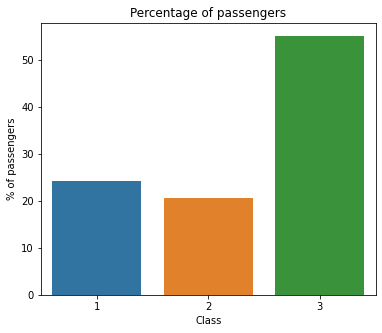

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x="Class",y="% of passengers",data=Pclass)
plt.title("Percentage of passengers")
plt.show()

In [ ]:
Sex=train_cat["Sex"].value_counts(normalize=True)
Sex=pd.DataFrame(Sex)
Sex=Sex.reset_index()
#Fixing column names
Sex=Sex.rename(columns={"index":"Sex","Sex":"% of passengers"})
Sex=Sex.sort_values(by='Sex')
Sex["% of passengers"]=Sex["% of passengers"]*100
Sex["% of passengers"]=np.round(Sex["% of passengers"],2)
display(Sex)

,Sex,% of passengers
1,female,35.24
0,male,64.76


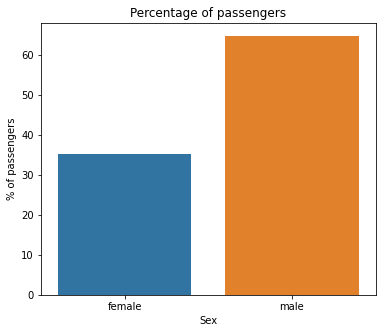

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x="Sex",y="% of passengers",data=Sex)
plt.title("Percentage of passengers")
plt.show()

In [ ]:
Ticket=train_cat["Ticket"].value_counts(normalize=True)
Ticket=pd.DataFrame(Ticket)
Ticket=Ticket.reset_index()
#Fixing column names
Ticket=Ticket.rename(columns={"index":"Ticket","Ticket":"% of passengers"})
#Ticket=Ticket.sort_values(by='Ticket')
Ticket["% of passengers"]=Ticket["% of passengers"]*100
Ticket["% of passengers"]=np.round(Ticket["% of passengers"],2)
display(Ticket)

,Ticket,% of passengers
0,347082,0.79
1,CA. 2343,0.79
2,1601,0.79
3,3101295,0.67
4,CA 2144,0.67
...,...,...
676,9234,0.11
677,19988,0.11
678,2693,0.11
679,PC 17612,0.11


In [ ]:
train=train[['Survived','Pclass','Sex','Age','Fare']]
train.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [ ]:
train.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [ ]:
test_x=test[['Pclass','Sex','Age','Fare']]


In [ ]:
test_x.groupby('Sex')['Age'].mean()

Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64

In [ ]:
#fillna=fill not available values
train['Age']=train.groupby("Sex")['Age'].transform(lambda x:x.fillna(x.mean()))

In [ ]:
test_x['Age']=test_x.groupby("Sex")['Age'].transform(lambda x:x.fillna(x.mean()))

In [ ]:
test_x.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      1
dtype: int64

In [ ]:
test_x["Fare"].fillna(test_x['Fare'].mean(),inplace=True)

In [ ]:
test_x.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

#**ALGORITHM**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Change categorical columns to numerical 
le=LabelEncoder()

In [ ]:
train['Sex']=le.fit_transform(train.Sex)
train.head()

NameError: ignored

In [ ]:
train.info()

In [ ]:
X=train[['Pclass','Sex','Age','Fare']]
Y=train['Survived']

In [ ]:
test_x['Sex']=le.fit_transform(test_x.Sex)
test_x.head()

In [ ]:
X.isnull().sum()

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
y_train=train["Survived"]

In [ ]:
sc=StandardScaler()
X=sc.fit_transform(X)
test_x=sc.fit_transform(test_x)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X,y_train)

In [ ]:
y_pred=model.predict(test_x)
print(y_pred)

In [ ]:
gender_sub_data=pd.read_csv('gender_submission.csv')
gender_sub_data.head()

In [ ]:
y_test=gender_sub_data["Survived"]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

NameError: ignored

In [ ]:
print("Training Accuracy :",model.score(X,y_train))
print("Testing Accuracy :",model.score(test_x,y_test))

In [ ]:
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(model,filled=True)
plt.show()

LOGISTIC REGRESSION

In [ ]:
  from sklearn.linear_model import LogisticRegression
  classifier1=LogisticRegression(random_state=0)
  classifier1.fit(X,y_train)

In [ ]:
print("Training Accuracy :",classifier1.score(X,y_train))
print("Testing Accuracy :",classifier1.score(test_x,y_test))

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier2=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier2.fit(X,y_train)

In [ ]:
print("Training Accuracy :",classifier2.score(X,y_train))
print("Testing Accuracy :",classifier2.score(test_x,y_test))